# **PROJET 5 DATA ANALYST**

Optimisez la gestion des données d'une boutique avec R ou Python

## **Etape 1 - Importation des librairies et chargement des fichiers**

In [1]:
#Accès au google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1.1 - Importation des librairies**

In [2]:
#Importation de la librairie Pandas
import pandas as pd

**1.2 - Chargement des fichiers Excel**

In [3]:
#Importation du fichier liaison.csv
liaison_csv ='/content/drive/MyDrive/Herbet_Thomas_P5/liaison.csv'
liaison = pd.read_csv(liaison_csv, sep=';')

#Importation du fichier erp.csv
erp_csv ='/content/drive/MyDrive/Herbet_Thomas_P5/erp.csv'
erp = pd.read_csv(erp_csv, sep=',')

#Importation du fichier web.csv
web_csv ='/content/drive/MyDrive/Herbet_Thomas_P5/web.csv'
web = pd.read_csv(web_csv, sep=';')


## **Etape 2 - Analyse exploratoire des fichiers**

**2.1 - Analyse exploratoire du fichier liaison**

In [4]:
#Afficher les dimensions du dataset
print('Il y a :', liaison.shape[0], 'lignes')

Il y a : 825 lignes


In [5]:
from tables.table import Column
#Consulter le nombre de colonnes
print('Il y a :', liaison.shape[1], 'colonnes.')

Il y a : 2 colonnes.


In [6]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(liaison.dtypes)}")

La nature des données est : product_id     int64
id_web        object
dtype: object


In [7]:
#Describe de liaison
liaison.describe()

,product_id
count,825.000000
mean,5162.597576
std,902.644635
min,3847.000000
25%,4348.000000
50%,4907.000000
75%,5805.000000
max,7338.000000


In [8]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(liaison.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : product_id    825
id_web        734
dtype: int64


In [9]:
#Affichage les 5 premières lignes de la table
liaison.head()

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


In [10]:
#changement du nom de la colonne id_web par sku
liaison.rename(columns={'id_web':'sku'}, inplace=True)
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,NaN
821,7204,NaN
822,7247,13127-1
823,7329,14680-1


In [11]:
#remplacement de la valeur "bon-cadeau-25-euros" par 19823 dans la colonne 'id_web'
liaison['sku'].replace('bon-cadeau-25-euros', 19823)

#remplacement de la valeur "13127-1" par 19824 dans la colonne 'id_web'
liaison['sku'].replace('13127-1', 13127)

#remplacement de la valeur "14680-1" par 14680 dans la colonne 'id_web'
liaison['sku'].replace('14680-1', 14680)

0        15298
1        15296
2        15300
3        19814
4        19815
        ...   
820        NaN
821        NaN
822    13127-1
823      14680
824      16230
Name: sku, Length: 825, dtype: object

In [12]:
#contrôle de valeur en doublon sur la colonne product_id
liaison.loc[liaison['product_id'].duplicated(keep=False),:]

,product_id,sku


In [13]:
#contrôle de valeur en doublon sur la colonne sku
liaison.loc[liaison['sku'].duplicated(keep=False),:]

,product_id,sku
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN
...,...,...
817,7196,NaN
818,7200,NaN
819,7201,NaN
820,7203,NaN


In [14]:
#comptabilisation du nombre de valeurs manquantes
print(liaison.isnull().sum())

product_id     0
sku           91
dtype: int64


In [15]:
#Conversion de la colonne sous nutrition en numérique
liaison['sku'] = pd.to_numeric(liaison['sku'], errors='coerce')

In [16]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
liaison = liaison.fillna(0)

In [17]:
#contrôle des valeurs manquantes
print(liaison.isnull().sum())

product_id    0
sku           0
dtype: int64


In [18]:
#conversion de la colonne sku en nombre entier
liaison['sku'] = liaison['sku'].astype(int)

In [19]:
liaison

,product_id,sku
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
...,...,...
820,7203,0
821,7204,0
822,7247,0
823,7329,0


**2.2 - Analyse exploratoire du fichier ERP**

In [20]:
#Afficher les dimensions du dataset
print('Il y a :', erp.shape[0], 'lignes')

Il y a : 825 lignes


In [21]:
#Consulter le nombre de colonnes
print('Il y a :', erp.shape[1], 'colonnes.')

Il y a : 5 colonnes.


In [22]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(erp.dtypes)}")

La nature des données est : product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
dtype: object


In [23]:
#Describe de liaison
erp.describe()

,product_id,onsale_web,price,stock_quantity
count,825.000000,825.000000,825.000000,825.000000
mean,5162.597576,0.869091,32.384000,26.583030
std,902.644635,0.337506,26.832271,45.875948
min,3847.000000,0.000000,-8.000000,-1.000000
25%,4348.000000,1.000000,14.600000,1.000000
50%,4907.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


In [24]:
#Le nombre de valeurs présentes dans chacune des colonnes

print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(erp.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
dtype: int64


In [25]:
#nombre de valeurs négatives, colonne stock_quantity
erp_stock_quantity_negatif = (erp['stock_quantity']<0).sum()
print('Il y a :', erp_stock_quantity_negatif, 'valeurs négatives.')

#nombre de valeurs nulles, colonne stock_quantity
erp_stock_quantity_null = (erp['stock_quantity']==0).sum()
print('Il y a :', erp_stock_quantity_null, 'valeurs nulles.')


# Convert 'price' column to numeric (float) data type
erp['price'] = pd.to_numeric(erp['price'], errors='coerce')

# Count the number of negative values in the 'price' column
erp_price_negatif = (erp['price'] < 0).sum()
print('Il y a :', erp_price_negatif, 'valeurs négatives.')


Il y a : 2 valeurs négatives.
Il y a : 181 valeurs nulles.
Il y a : 2 valeurs négatives.


In [26]:
#nouveau dataframe sans les valeurs négatives
erp_nb_positifs = erp.loc[(erp['price'] >= 0) & (erp['stock_quantity'] >= 0)]
erp_nb_positifs

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
...,...,...,...,...,...
820,7203,0,45.0,30,instock
821,7204,0,45.0,9,instock
822,7247,1,54.8,23,instock
823,7329,0,26.5,14,instock


In [27]:
#Affichage les 5 premières lignes de la table
erp_nb_positifs.head()

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


In [28]:
erp_nb_positifs.describe()

,product_id,onsale_web,price,stock_quantity
count,821.000000,821.000000,821.000000,821.000000
mean,5160.607795,0.872107,32.486358,26.481121
std,903.226044,0.334174,26.820408,45.593551
min,3847.000000,0.000000,5.200000,0.000000
25%,4337.000000,1.000000,14.700000,1.000000
50%,4903.000000,1.000000,24.400000,11.000000
75%,5805.000000,1.000000,42.000000,34.000000
max,7338.000000,1.000000,225.000000,578.000000


**2.3 - Analyse exploratoire du fichier Web**

In [29]:
#Afficher les dimensions du dataset
print('Il y a :', web.shape[0], 'lignes')

Il y a : 1513 lignes


In [30]:
#Consulter le nombre de colonnes
print('Il y a :', web.shape[1], 'colonnes.')

Il y a : 28 colonnes.


In [31]:
#La nature des données dans chacune des colonnes
print(f"La nature des données est : {(web.dtypes)}")

La nature des données est : sku                       object
virtual                    int64
downloadable               int64
rating_count               int64
average_rating           float64
total_sales              float64
tax_status                object
tax_class                float64
post_author              float64
post_date                 object
post_date_gmt             object
post_content             float64
post_title                object
post_excerpt              object
post_status               object
comment_status            object
ping_status               object
post_password            float64
post_name                 object
post_modified             object
post_modified_gmt         object
post_content_filtered    float64
post_parent              float64
guid                      object
menu_order               float64
post_type                 object
post_mime_type            object
comment_count            float64
dtype: object


In [32]:
#Le nombre de valeurs présentes dans chacune des colonnes
print(f"La nombre de valeurs présentes dans chacune des colonnes est : {(web.count())}")

La nombre de valeurs présentes dans chacune des colonnes est : sku                      1428
virtual                  1513
downloadable             1513
rating_count             1513
average_rating           1430
total_sales              1430
tax_status                716
tax_class                   0
post_author              1430
post_date                1430
post_date_gmt            1430
post_content                0
post_title               1430
post_excerpt              716
post_status              1430
comment_status           1430
ping_status              1430
post_password               0
post_name                1430
post_modified            1430
post_modified_gmt        1430
post_content_filtered       0
post_parent              1430
guid                     1430
menu_order               1430
post_type                1430
post_mime_type            714
comment_count            1430
dtype: int64


In [33]:
#Affichage les 5 premières lignes de la table
web.head()

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [34]:
#contrôle de valeur en doublon sur la colonne sku
web.loc[web['sku'].duplicated(keep=False),:]

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,NaN,NaN,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,15075,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,16209,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,15763,0,0,0,0.0,1.0,NaN,NaN,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,NaN,NaN,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1510,15910,0,0,0,0.0,0.0,taxable,NaN,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,#########,#########,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1511,38,0,0,0,0.0,38.0,NaN,NaN,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,#########,#########,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


In [35]:
#comptabilisation du nombre de valeurs manquantes
print(web.isnull().sum())

sku                        85
virtual                     0
downloadable                0
rating_count                0
average_rating             83
total_sales                83
tax_status                797
tax_class                1513
post_author                83
post_date                  83
post_date_gmt              83
post_content             1513
post_title                 83
post_excerpt              797
post_status                83
comment_status             83
ping_status                83
post_password            1513
post_name                  83
post_modified              83
post_modified_gmt          83
post_content_filtered    1513
post_parent                83
guid                       83
menu_order                 83
post_type                  83
post_mime_type            799
comment_count              83
dtype: int64


In [36]:
#Conversion de la colonne sous nutrition en numérique
web['sku'] = pd.to_numeric(web['sku'], errors='coerce')

In [37]:
#Conversion de la colonne (avec l'argument errors=coerce qui permet de convertir automatiquement les lignes qui ne sont pas des nombres en NaN)
#Puis remplacement des NaN en 0
web = web.fillna(0)

In [38]:
#controle du nombre de valeurs manquantes
print(web.isnull().sum())

sku                      0
virtual                  0
downloadable             0
rating_count             0
average_rating           0
total_sales              0
tax_status               0
tax_class                0
post_author              0
post_date                0
post_date_gmt            0
post_content             0
post_title               0
post_excerpt             0
post_status              0
comment_status           0
ping_status              0
post_password            0
post_name                0
post_modified            0
post_modified_gmt        0
post_content_filtered    0
post_parent              0
guid                     0
menu_order               0
post_type                0
post_mime_type           0
comment_count            0
dtype: int64


In [39]:
#conversion de la colonne sku en nombre entier
web['sku'] = web['sku'].astype(int)

In [40]:
#remplacement de la valeur "bon-cadeau-25-euros" par 19823 dans la colonne 'id_web'
web['sku'] = web['sku'].replace('bon-cadeau-25-euros', 19823)

#remplacement de la valeur "13127-1" par 19824 dans la colonne 'id_web'
web['sku'] = web['sku'].replace('13127-1', 19824)

#remplacement de la valeur "14680-1" par 14680 dans la colonne 'id_web'
web['sku'] = web['sku'].replace('14680-1', 14680)

In [41]:
#suppression des doublons
#web = web.drop_duplicates(['sku'])

In [42]:
#Affichage les 5 premières lignes de la table
web

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,16004,0,0,0,0.0,5.0,0,0.0,2.0,2018-06-07 16:27:25,...,chateau-du-couvent-pomerol-2017,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1,0,0,0,0,0.0,0.0,0,0.0,0.0,0,...,0,0,0,0.0,0.0,0,0.0,0,0,0.0
2,15075,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-14 15:39:43,...,pares-balta-penedes-indigena-2017,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
3,16209,0,0,0,0.0,6.0,taxable,0.0,2.0,2018-02-14 17:15:31,...,maurel-cabardes-tradition-2017,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
4,15763,0,0,0,0.0,1.0,0,0.0,2.0,2020-01-25 14:08:16,...,domaine-de-la-monardiere-vacqueyras-les-vieill...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,12881,0,0,0,0.0,2.0,0,0.0,2.0,2019-03-28 15:25:14,...,montbourgeau-etoile-vin-jaune-2009,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15663,0,0,0,0.0,3.0,taxable,0.0,2.0,2018-02-27 10:27:01,...,chermette-domaine-du-vissoux-brouilly-pierreux...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1510,15910,0,0,0,0.0,0.0,taxable,0.0,2.0,2019-03-28 10:59:43,...,thevenet-quintaine-vire-clesse-la-bongran-2015,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0
1511,38,0,0,0,0.0,38.0,0,0.0,2.0,2018-04-18 12:25:58,...,emile-boeckel-cremant-brut-blanc-de-blancs,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


## **Etape 3 - Jointure et nettoyage**

In [43]:
#jointure des dataframes : erp et liaison
merge_df = liaison.merge(erp_nb_positifs, on='product_id', how='outer').merge(web, on='sku', how='outer',indicator='source')

In [44]:
merge_df

,product_id,sku,onsale_web,price,stock_quantity,stock_status,virtual,downloadable,rating_count,average_rating,...,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count,source
0,3847,15298,1.0,24.2,0.0,outofstock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,both
1,3847,15298,1.0,24.2,0.0,outofstock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
2,3849,15296,1.0,34.3,0.0,outofstock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
3,3849,15296,1.0,34.3,0.0,outofstock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,both
4,3850,15300,1.0,20.8,0.0,outofstock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9804,7023,15891,1.0,27.5,15.0,instock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
9805,7025,15887,1.0,69.0,2.0,instock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,both
9806,7025,15887,1.0,69.0,2.0,instock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0,both
9807,7338,16230,1.0,16.3,45.0,instock,0.0,0.0,0.0,0.0,...,#########,#########,0.0,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,0,0.0,both


In [45]:
#Filtrage des données du dataframe merge_df
selected_columns = ['product_id', 'sku','onsale_web', 'price', 'stock_quantity', 'stock_status', 'total_sales', 'tax_status', 'post_title']
selected_df = merge_df.loc[:, selected_columns]
#vérification du dataframe nettoyé selected_df
selected_df

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_title
0,3847,15298,1.0,24.2,0.0,outofstock,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018
1,3847,15298,1.0,24.2,0.0,outofstock,6.0,0,Pierre Jean Villa Saint-Joseph Préface 2018
2,3849,15296,1.0,34.3,0.0,outofstock,0.0,0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
3,3849,15296,1.0,34.3,0.0,outofstock,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017
4,3850,15300,1.0,20.8,0.0,outofstock,0.0,0,Pierre Jean Villa Crozes-Hermitage Accroche Co...
...,...,...,...,...,...,...,...,...,...
9804,7023,15891,1.0,27.5,15.0,instock,0.0,0,Camin Larredya Jurançon Sec La Virada 2018
9805,7025,15887,1.0,69.0,2.0,instock,0.0,taxable,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
9806,7025,15887,1.0,69.0,2.0,instock,0.0,0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018
9807,7338,16230,1.0,16.3,45.0,instock,0.0,taxable,Domaine Saint-Nicolas Vin de France Blanc Les ...


In [47]:
selected_df['concat_column'] = selected_df['sku'].astype(str) + selected_df['total_sales'].astype(str)
# Créez un nouveau DataFrame avec des valeurs uniques de la colonne 'concat_column'
unique_df = selected_df.drop_duplicates(subset=['concat_column'], keep='first')
# Liste des index à supprimer bon cadeau par exemple
indexes_to_drop = [0,20, 47, 8959]

# Supprimer les lignes correspondant aux index spécifiés
unique_df = unique_df.drop(indexes_to_drop)


## **Etape 4 - Calcul du Chiffre d'affaires par produit**

In [48]:
unique_df['CA_pdt'] = unique_df['price'] * unique_df['total_sales']

In [49]:
unique_df

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_title,concat_column,CA_pdt
2,3849,15296,1.0,34.3,0.0,outofstock,0.0,0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,152960.0,0.0
4,3850,15300,1.0,20.8,0.0,outofstock,0.0,0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,153000.0,0.0
6,4032,19814,1.0,14.1,0.0,outofstock,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,198143.0,42.3
8,4039,19815,1.0,46.0,0.0,outofstock,0.0,taxable,Pierre Jean Villa Côte Rôtie Carmina 2017,198150.0,0.0
10,4040,15303,1.0,34.3,0.0,outofstock,0.0,0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,153030.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9799,6928,15741,1.0,19.0,20.0,instock,2.0,taxable,Le Cèdre de Jean Faure Saint-Emilion 2016,157412.0,38.0
9801,6930,16135,1.0,8.4,83.0,instock,5.0,0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,161355.0,42.0
9803,7023,15891,1.0,27.5,15.0,instock,0.0,taxable,Camin Larredya Jurançon Sec La Virada 2018,158910.0,0.0
9805,7025,15887,1.0,69.0,2.0,instock,0.0,taxable,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,158870.0,0.0


In [50]:
unique_df.to_csv('/content/drive/MyDrive/Herbet_Thomas_P5/unique_df.csv', index=True)

In [51]:
#le CA c'est 70568 €
unique_df['CA_pdt'].sum()

70568.29999999999

In [52]:
#Création d'une liste avec tout les produits
product_name = unique_df['post_title'].tolist()

#Boucle for pour avoir le chiffre d'affaires par produit
for name in product_name:
    total_turnover = unique_df.loc[unique_df['post_title'] == name, 'CA_pdt'].sum()
    print(f"Chiffre d'affaires total pour le produit '{name}': {round(total_turnover),2}",'€')

Chiffre d'affaires total pour le produit 'Pierre Jean Villa Saint-Joseph Rouge Tildé 2017': (0, 2) €
Chiffre d'affaires total pour le produit 'Pierre Jean Villa Crozes-Hermitage Accroche Coeur 2018': (0, 2) €
Chiffre d'affaires total pour le produit 'Pierre Jean Villa IGP Collines Rhodaniennes Gamine 2018': (42, 2) €
Chiffre d'affaires total pour le produit 'Pierre Jean Villa Côte Rôtie Carmina 2017': (0, 2) €
Chiffre d'affaires total pour le produit 'Pierre Jean Villa Saint-Joseph Saut De l'Ange 2018': (0, 2) €
Chiffre d'affaires total pour le produit 'Pierre Gaillard Condrieu 2018': (0, 2) €
Chiffre d'affaires total pour le produit 'Pierre Gaillard Cornas 2017': (218, 2) €
Chiffre d'affaires total pour le produit 'Pierre Gaillard Côte Rôtie Esprit de Blonde 2017': (180, 2) €
Chiffre d'affaires total pour le produit 'Pierre Gaillard Côte Rôtie 2018': (596, 2) €
Chiffre d'affaires total pour le produit 'Pierre Gaillard Côtes-du-Rhône Blanc Les Gendrines 2018': (0, 2) €
Chiffre d'affair

## **Etape 5 - Calcul du Chiffre d'affaires pour le Web**

In [53]:
#Filte du dataframe sur la colonne onsale_web
web_sales_df = unique_df.loc[unique_df['onsale_web'] == 1]

#Calcul du CA pour le web en utilisant sum()
total_web_turnover = web_sales_df['CA_pdt'].sum()

print("Chiffre d'affaires réalisé sur le web:", total_web_turnover, '€')

Chiffre d'affaires réalisé sur le web: 70310.0 €


## **Etape 6 - Recherche des erreurs de saisie - Analyse univariée**

In [54]:
#Importation de la librairie Pandas
import matplotlib.pyplot as plt

In [55]:
selected_df['CA_pdt'] = selected_df['price'] * selected_df['total_sales']

In [56]:
selected_df_positif = selected_df.loc[selected_df['CA_pdt'] > 0]
selected_df_positif

,product_id,sku,onsale_web,price,stock_quantity,stock_status,total_sales,tax_status,post_title,concat_column,CA_pdt
0,3847,15298,1.0,24.2,0.0,outofstock,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,152986.0,145.2
1,3847,15298,1.0,24.2,0.0,outofstock,6.0,0,Pierre Jean Villa Saint-Joseph Préface 2018,152986.0,145.2
6,4032,19814,1.0,14.1,0.0,outofstock,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,198143.0,42.3
7,4032,19814,1.0,14.1,0.0,outofstock,3.0,0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,198143.0,42.3
14,4042,16042,1.0,31.2,34.0,instock,7.0,0,Pierre Gaillard Cornas 2017,160427.0,218.4
...,...,...,...,...,...,...,...,...,...,...,...
9798,6926,15845,1.0,49.9,24.0,instock,1.0,0,Château Jean Faure Saint-Emilion Grand Cru 2016,158451.0,49.9
9799,6928,15741,1.0,19.0,20.0,instock,2.0,taxable,Le Cèdre de Jean Faure Saint-Emilion 2016,157412.0,38.0
9800,6928,15741,1.0,19.0,20.0,instock,2.0,0,Le Cèdre de Jean Faure Saint-Emilion 2016,157412.0,38.0
9801,6930,16135,1.0,8.4,83.0,instock,5.0,0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,161355.0,42.0


In [57]:
effectifs = selected_df_positif["post_title"].value_counts()
modalites = effectifs.index # l'index de effectifs contient les modalités

tab = pd.DataFrame(modalites, columns = ["post_title"]) # création du tableau à partir des modalités
tab["n"] = effectifs.values
tab["f"] = tab["n"] / len(selected_df_positif) # len(selected_df) renvoie la taille de l'échantillon

tab = tab.sort_values("post_title") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée

print(tab)

                                            post_title  n        f        F
171              Agnès Levet Côte Rôtie Améthyste 2017  2  0.00177  0.00177
146               Agnès Levet Côte Rôtie Maestria 2017  2  0.00177  0.00354
123               Agnès Levet Côte Rôtie Péroline 2017  2  0.00177  0.00531
22          Alain Graillot Crozes-Hermitage Blanc 2018  2  0.00177  0.00708
23          Alain Graillot Crozes-Hermitage Rouge 2017  2  0.00177  0.00885
..                                                 ... ..      ...      ...
290    Xavier Frissant Touraine Les Roses du Clos 2018  2  0.00177  0.99292
315            Xavier Frissant Touraine Sauvignon 2019  2  0.00177  0.99469
109               Zind-Humbrecht Muscat Turckheim 2016  2  0.00177  0.99646
272  Zind-Humbrecht Riesling Herrenweg de Turckheim...  2  0.00177  0.99823
271                           Zind-Humbrecht Zind 2017  2  0.00177  1.00000

[385 rows x 4 columns]


In [58]:
selected_df['post_title'].mode()

0    0
Name: post_title, dtype: object

In [59]:
selected_df_positif['CA_pdt'].mean()

208.8441592920354

In [60]:
selected_df_positif['CA_pdt'].median()

122.69999999999999

In [61]:
print("Chiffre d'affaires total:", selected_df_positif['CA_pdt'].sum(), '€')

Chiffre d'affaires total: 235993.90000000002 €


In [62]:
selected_df_positif['CA_pdt'].var()

91509.5563033227

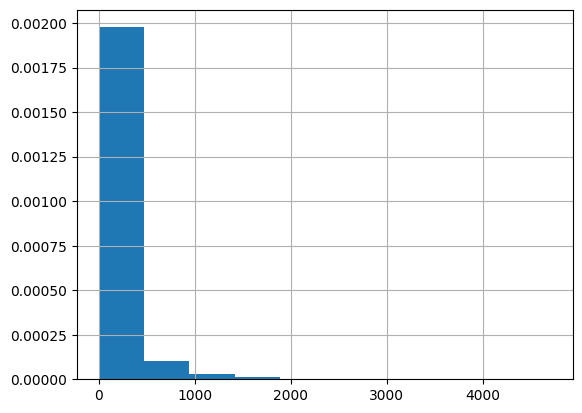

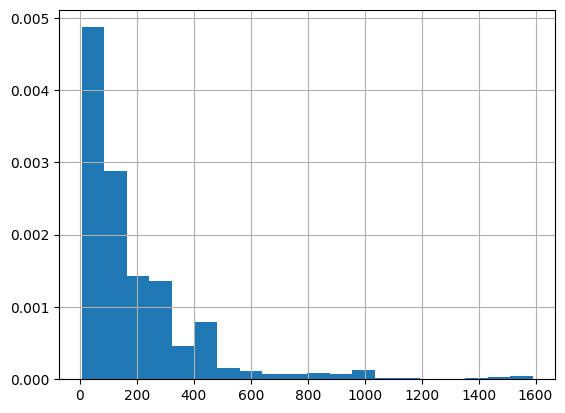

In [63]:
# Histogramme
selected_df_positif['CA_pdt'].hist(density=True)
plt.show()

# Histogramme plus beau
selected_df_positif[selected_df_positif.CA_pdt.abs() < 2000]['CA_pdt'].hist(density=True,bins=20)
plt.show()

In [64]:
#Ecart-Type
selected_df_positif['CA_pdt'].std()

302.5054649148056

In [65]:
selected_df_positif['CA_pdt'].std()/selected_df_positif['CA_pdt'].mean()

1.4484746230886913

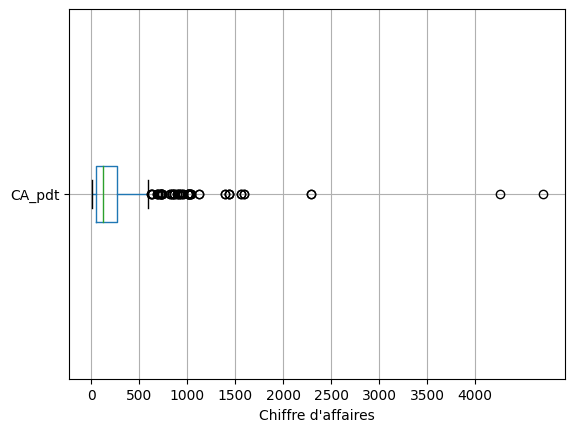

In [66]:
#Boite à moustache suffit
selected_df_positif.boxplot(column="CA_pdt", vert=False)

# Personnaliser les étiquettes de l'axe des abscisses
xtick_labels = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000]
plt.xticks(xtick_labels)

# Ajouter des labels et un titre
plt.xlabel('Chiffre d\'affaires')
plt.ylabel('')

# Afficher le graphique
plt.show()

In [67]:
selected_df_positif['CA_pdt'].skew()

6.700176451128598

In [68]:
selected_df_positif['CA_pdt'].kurtosis()

76.99705936534593

In [69]:
import scipy.stats as st
import numpy as np


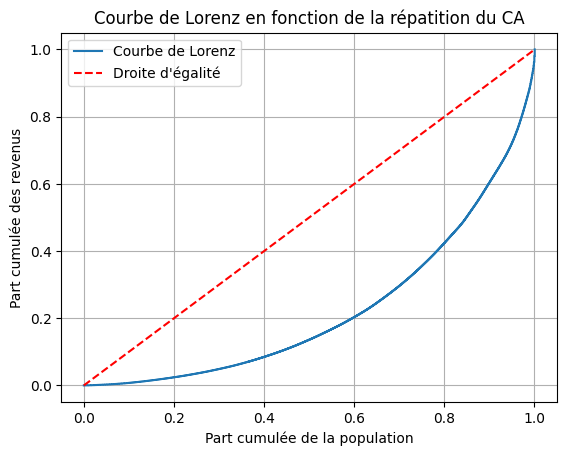

In [70]:
n = len(selected_df_positif['CA_pdt'])
lorenz = np.cumsum(np.sort(selected_df_positif['CA_pdt'])) / selected_df_positif['CA_pdt'].sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

# Tracer la courbe de Lorenz
plt.plot(xaxis,lorenz,drawstyle='steps-post', label='Courbe de Lorenz')

# Tracer la ligne d'égalité
equality_line = np.linspace(0, 1, n+1)
plt.plot(xaxis, equality_line, linestyle='--', color='red', label="Droite d'égalité")

# Ajouter des labels et une légende
plt.xlabel('Part cumulée de la population')
plt.ylabel('Part cumulée des revenus')
plt.title('Courbe de Lorenz en fonction de la répatition du CA')
plt.legend()
plt.grid()
# Afficher le graphique
plt.show()

In [71]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.5486613005187659

In [72]:

null_rows = selected_df[selected_df['price'].isnull()]
print(null_rows)


      product_id    sku  onsale_web  price  stock_quantity stock_status  \
2352        4973      0         NaN    NaN             NaN          NaN   
2353        4973      0         NaN    NaN             NaN          NaN   
2354        4973      0         NaN    NaN             NaN          NaN   
2355        4973      0         NaN    NaN             NaN          NaN   
2356        4973      0         NaN    NaN             NaN          NaN   
...          ...    ...         ...    ...             ...          ...   
3595        6594      0         NaN    NaN             NaN          NaN   
3596        6594      0         NaN    NaN             NaN          NaN   
3597        6594      0         NaN    NaN             NaN          NaN   
9433        5700  14736         NaN    NaN             NaN          NaN   
9434        5700  14736         NaN    NaN             NaN          NaN   

      total_sales tax_status                                       post_title  \
2352          0.0 

In [73]:
selected_df.dropna(subset=['price'], inplace=True)

In [74]:
# on importe scipy pour utiliser la fonction qui nous intéresse
from scipy.stats import zscore
# calcul du zscore dans la colonne concernée
selected_df['price_zscore'] = zscore(selected_df['price'])
# on définit un seuil (arbitraire)
threshold = 2.5
outliers_zscore = selected_df[abs(selected_df['price_zscore']) > threshold]
print(outliers_zscore)

      product_id    sku  onsale_web  price  stock_quantity stock_status  \
1017        4594      0         1.0  144.0             0.0   outofstock   
1018        4594      0         1.0  144.0             0.0   outofstock   
1019        4594      0         1.0  144.0             0.0   outofstock   
1020        4594      0         1.0  144.0             0.0   outofstock   
1021        4594      0         1.0  144.0             0.0   outofstock   
...          ...    ...         ...    ...             ...          ...   
9694        6214  11601         1.0   99.0             7.0      instock   
9695        6215  12790         1.0  115.0             4.0      instock   
9696        6215  12790         1.0  115.0             4.0      instock   
9697        6216  15070         1.0  121.0             6.0      instock   
9698        6216  15070         1.0  121.0             6.0      instock   

      total_sales tax_status  \
1017          0.0          0   
1018          0.0          0   
101